
Challenge Description:
Scenario: You are a data analyst working with a dataset of global weather. Your task is to analyze temperature trends and visualize the results.

Tasks:

1. Data Preparation:

Hint 1: Use np.random.uniform(low, high, size) to generate the temperature data.
Hint 2: Create a DataFrame using pd.DataFrame(data, index, columns) with appropriate index and columns.

Use NumPy to generate a synthetic dataset representing average monthly temperatures (in degrees Celsius) for 12 months across 10 different cities. The temperatures should range from -5 to 35 degrees.

Convert this NumPy array into a Pandas DataFrame, adding city names as index and months as columns.
2. Data Analysis:

Hint 1: Calculate the annual average temperature using DataFrame.mean(axis).
Hint 2: Find the city with the highest and lowest average temperature using idxmax() and idxmin() methods.

Calculate the annual average temperature for each city.

Identify the city with the highest and lowest average temperature for the year.
3. Data Visualization:

Deliverables:
A Jupyter Notebook containing all the code for data generation, analysis, and visualization.
A brief report within the notebook summarizing your findings, including the city with the highest and lowest average temperatures and any interesting trends observed in the data.


Evaluation Criteria:
Correctness and efficiency of NumPy and Pandas code used for data manipulation.
Effectiveness of data visualization in conveying the temperature trends.
Clarity and conciseness of the summary report.
Good luck!

In [12]:
import numpy as np
import pandas as pd
cities = [
    ["Yakutsk", "Russia"],
    ["Kuwait City", "Kuwait"],
    ["Reykjavik", "Iceland"],
    ["Singapore", "Singapore"],
    ["Nuuk", "Greenland"],
    ["Lima", "Peru"],
    ["Fairbanks", "USA"],
    ["Mumbai", "India"],
    ["Sydney", "Australia"],
    ["Cape Town", "South Africa"]
]

temperatures = np.random.uniform(low=-5, high=35, size=(10, 12)).astype(np.int64)

df = pd.DataFrame(
    data=temperatures,
    columns=[
        "January", "February", "March", "April", "May", "June",
        "July", "August", "September", "October", "November", "December"
    ]
)

df.insert(0, "City", [city[0] for city in cities])
df.insert(1, "Country", [city[1] for city in cities])

df

,City,Country,January,February,March,April,May,June,July,August,September,October,November,December
0,Yakutsk,Russia,-4,30,28,3,7,9,20,22,28,17,1,17
1,Kuwait City,Kuwait,0,30,6,22,4,18,1,17,28,9,26,24
2,Reykjavik,Iceland,34,22,20,-4,29,28,3,21,26,31,5,25
3,Singapore,Singapore,16,13,33,6,20,-1,-4,13,2,27,0,31
4,Nuuk,Greenland,6,13,7,20,24,23,26,19,15,18,13,-1
5,Lima,Peru,20,-4,2,-3,1,2,29,9,9,6,24,17
6,Fairbanks,USA,18,1,13,-1,5,23,15,11,0,18,24,33
7,Mumbai,India,21,12,16,0,19,0,22,19,22,-4,19,7
8,Sydney,Australia,10,10,14,32,23,12,4,-1,12,22,15,21
9,Cape Town,South Africa,-1,21,31,-1,-4,20,9,23,7,0,12,1


In [20]:
annual_avg_temp = df.iloc[:, 2:].mean(axis=1).astype(np.int64)
annual_avg_temp

0    14
1    15
2    20
3    13
4    15
5     9
6    13
7    12
8    14
9     9
dtype: int64

In [35]:
df['Annual Avg Temp'] = annual_avg_temp


In [36]:
df

,City,Country,January,February,March,April,May,June,July,August,September,October,November,December,Annual Avg Temp
0,Yakutsk,Russia,-4,30,28,3,7,9,20,22,28,17,1,17,14
1,Kuwait City,Kuwait,0,30,6,22,4,18,1,17,28,9,26,24,15
2,Reykjavik,Iceland,34,22,20,-4,29,28,3,21,26,31,5,25,20
3,Singapore,Singapore,16,13,33,6,20,-1,-4,13,2,27,0,31,13
4,Nuuk,Greenland,6,13,7,20,24,23,26,19,15,18,13,-1,15
5,Lima,Peru,20,-4,2,-3,1,2,29,9,9,6,24,17,9
6,Fairbanks,USA,18,1,13,-1,5,23,15,11,0,18,24,33,13
7,Mumbai,India,21,12,16,0,19,0,22,19,22,-4,19,7,12
8,Sydney,Australia,10,10,14,32,23,12,4,-1,12,22,15,21,14
9,Cape Town,South Africa,-1,21,31,-1,-4,20,9,23,7,0,12,1,9


In [25]:
#  Identify the city with the highest and lowest average temperature for the year.
max_temp = np.max(annual_avg_temp)
max_temp

np.int64(20)

In [30]:
max_temp_city = df['City'][annual_avg_temp.idxmax()]
max_temp_city

'Reykjavik'

In [26]:
min_temp = np.min(annual_avg_temp)
min_temp

np.int64(9)

In [31]:
min_temp_city = df['City'][annual_avg_temp.idxmin()]
min_temp_city

'Lima'

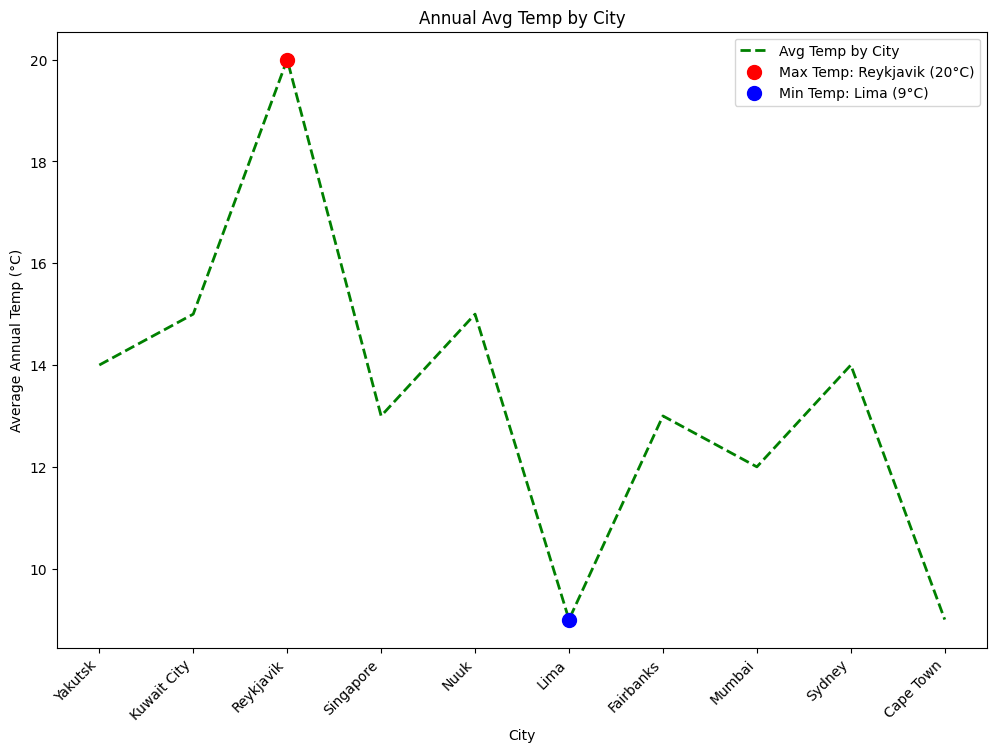

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.plot(df['City'], df['Annual Avg Temp'], label="Avg Temp by City", color="green", linestyle="--", linewidth=2)
max_temp_index = df['Annual Avg Temp'].idxmax()
min_temp_index = df['Annual Avg Temp'].idxmin()

plt.scatter(df['City'][max_temp_index], df['Annual Avg Temp'][max_temp_index], color='red', s=100, label=f"Max Temp: {df['City'][max_temp_index]} ({df['Annual Avg Temp'][max_temp_index]}°C)", zorder=5)
plt.scatter(df['City'][min_temp_index], df['Annual Avg Temp'][min_temp_index], color='blue', s=100, label=f"Min Temp: {df['City'][min_temp_index]} ({df['Annual Avg Temp'][min_temp_index]}°C)", zorder=5)

# Add title and labels
plt.title("Annual Avg Temp by City")
plt.xlabel("City")
plt.ylabel("Average Annual Temp (°C)")
plt.xticks(rotation=45, ha='right')  # Rotate city names for better readability
plt.legend()

# Display the plot
plt.show()

I calculated the annual average temperature in celcius for each city and added it as a new column to the DataFrame. Then, I created a line plot to visualize the temperatures, with cities on the x-axis and temperatures on the y-axis. The plot was styled with a dashed green line, and markers for the highest and lowest temperatures were added using plt.scatter(), along with labels showing the city and temperature. The plot was displayed with rotated city names for better readability.

From this data we can note that from randomly generated temperatirse for cities around the world, Lima has the lowest annual average temperatures, and Reykjavik has the highest average annual temperatures. If we want to dive further into the data we can determine the region on earth where each city is located. 